## Practice

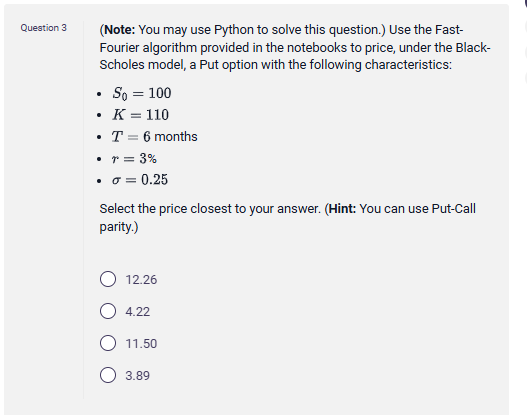

In [2]:
import numpy as np
from scipy.stats import norm

# Parameters
S_0 = 100  # Initial stock price
K = 110    # Strike price
T = 0.5    # Time to maturity (6 months = 0.5 years)
r = 0.03   # Risk-free rate (3%)
sigma = 0.25  # Volatility (25%)

# Compute d1 and d2
d1 = (np.log(S_0 / K) + (r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)

# Compute the call option price using the Black-Scholes formula
call_price = S_0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# Use Put-Call Parity to compute the put option price
put_price = call_price - S_0 + K * np.exp(-r * T)

# Output the result
print(f"Put Option Price: {put_price:.4f}")

Put Option Price: 12.2609


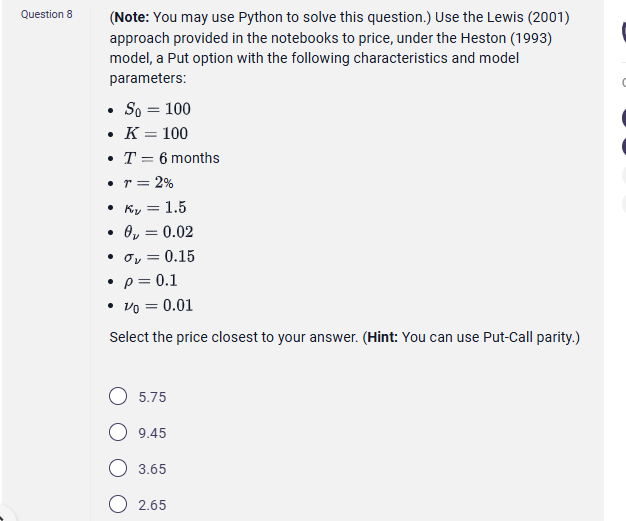

In [3]:
import numpy as np
from scipy.integrate import quad
from scipy.special import erfcx

# Parameters
S_0 = 100  # Initial stock price
K = 100    # Strike price
T = 0.5    # Time to maturity (6 months)
r = 0.02   # Risk-free interest rate
kappa_nu = 1.5  # Mean reversion speed of variance
theta_nu = 0.02  # Long-term mean of variance
sigma_nu = 0.15  # Volatility of volatility
rho = 0.1        # Correlation between stock returns and volatility
nu_0 = 0.01      # Initial variance

# Characteristic function of the Heston model
def char_func(u, T, S_0, r, kappa_nu, theta_nu, sigma_nu, rho, nu_0):
    i = complex(0, 1)
    d = np.sqrt((kappa_nu - i * rho * sigma_nu * u) ** 2 + sigma_nu ** 2 * (u * (u + i)))
    g = (kappa_nu - i * rho * sigma_nu * u - d) / (kappa_nu - i * rho * sigma_nu * u + d)
    C = (kappa_nu * theta_nu / sigma_nu ** 2) * ((kappa_nu - i * rho * sigma_nu * u - d) * T - 2 * np.log((1 - g * np.exp(-d * T)) / (1 - g)))
    D = (kappa_nu - i * rho * sigma_nu * u - d) / sigma_nu ** 2 * ((1 - np.exp(-d * T)) / (1 - g * np.exp(-d * T)))
    return np.exp(C + D * nu_0 + i * u * np.log(S_0) + i * u * r * T)

# Function to compute the Call option price using the Lewis (2001) approach
def call_price(T, S_0, K, r, kappa_nu, theta_nu, sigma_nu, rho, nu_0):
    def integrand(u):
        return np.real(np.exp(-i * u * np.log(K)) * char_func(u - i, T, S_0, r, kappa_nu, theta_nu, sigma_nu, rho, nu_0) / (i * u))
    
    # Numerical integration
    result, _ = quad(integrand, 1e-8, 100)
    return (S_0 - np.exp(-r * T) * K * result / np.pi)

# Compute the Call option price
C = call_price(T, S_0, K, r, kappa_nu, theta_nu, sigma_nu, rho, nu_0)

# Use Put-Call parity to compute the Put option price
P = C - S_0 + K * np.exp(-r * T)

# Output the result
print(f"Call Option Price: {C:.4f}")
print(f"Put Option Price: {P:.4f}")

NameError: name 'i' is not defined

In [4]:
import numpy as np
from scipy.integrate import quad

# Define imaginary unit
i = complex(0, 1)

# Parameters
S_0 = 100       # Initial stock price
K = 100         # Strike price
T = 0.5         # Time to maturity (6 months)
r = 0.02        # Risk-free interest rate
kappa_nu = 1.5  # Mean reversion speed of variance
theta_nu = 0.02 # Long-term mean of variance
sigma_nu = 0.15 # Volatility of volatility
rho = 0.1       # Correlation between stock returns and volatility
nu_0 = 0.01     # Initial variance

# Heston Characteristic Function
def char_func(u, T, S_0, r, kappa_nu, theta_nu, sigma_nu, rho, nu_0):
    d = np.sqrt((kappa_nu - i * rho * sigma_nu * u) ** 2 +
                sigma_nu ** 2 * (u * (u + i)))
    g = (kappa_nu - i * rho * sigma_nu * u - d) / (kappa_nu - i * rho * sigma_nu * u + d)
    C = (kappa_nu * theta_nu / sigma_nu ** 2) * (
        (kappa_nu - i * rho * sigma_nu * u - d) * T -
        2 * np.log((1 - g * np.exp(-d * T)) / (1 - g))
    )
    D = ((kappa_nu - i * rho * sigma_nu * u - d) / sigma_nu ** 2) * (
        (1 - np.exp(-d * T)) / (1 - g * np.exp(-d * T))
    )
    return np.exp(C + D * nu_0 + i * u * np.log(S_0) + i * u * r * T)

# Lewis (2001) Call Option Pricing via Fourier Integration
def call_price(T, S_0, K, r, kappa_nu, theta_nu, sigma_nu, rho, nu_0):
    def integrand(u):
        return np.real(np.exp(-i * u * np.log(K)) *
                       char_func(u - i, T, S_0, r, kappa_nu, theta_nu, sigma_nu, rho, nu_0) / (i * u))
    
    result, error = quad(integrand, 1e-8, 100, points=[1])  # integrate from small to large
    return S_0 - (np.exp(-r * T) * result / np.pi)

# Compute Call Price
C = call_price(T, S_0, K, r, kappa_nu, theta_nu, sigma_nu, rho, nu_0)

# Use Put-Call Parity: P = C - S_0 + K * e^{-rT}
P = C - S_0 + K * np.exp(-r * T)

# Output results
print(f"Call Option Price: {C:.4f}")
print(f"Put Option Price: {P:.4f}")

Call Option Price: 93.8888
Put Option Price: 92.8938


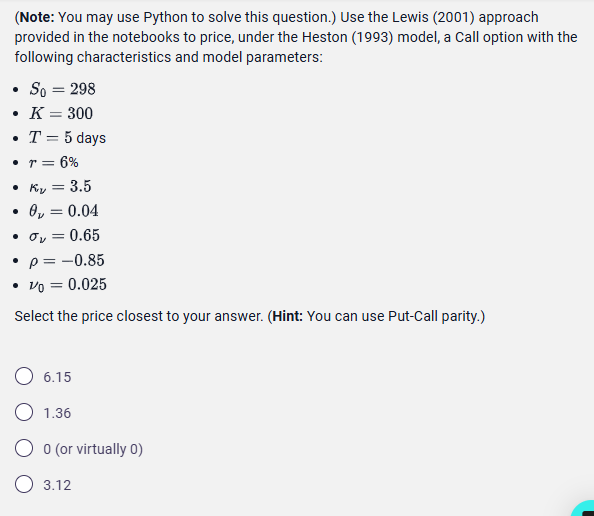

In [5]:
import numpy as np
from scipy.integrate import quad

# Define imaginary unit
i = complex(0, 1)

# Parameters
S_0 = 298       # Initial stock price
K = 300         # Strike price
T = 5 / 365     # Time to maturity in years (5 days)
r = 0.06        # Risk-free interest rate
kappa_nu = 3.5  # Mean reversion speed of variance
theta_nu = 0.04 # Long-term mean of variance
sigma_nu = 0.65 # Volatility of volatility
rho = -0.85     # Correlation between stock returns and volatility
nu_0 = 0.025    # Initial variance

# Heston Characteristic Function
def char_func(u, T, S_0, r, kappa_nu, theta_nu, sigma_nu, rho, nu_0):
    d = np.sqrt((kappa_nu - i * rho * sigma_nu * u) ** 2 +
                sigma_nu ** 2 * (u * (u + i)))
    g = (kappa_nu - i * rho * sigma_nu * u - d) / (kappa_nu - i * rho * sigma_nu * u + d)
    C = (kappa_nu * theta_nu / sigma_nu ** 2) * (
        (kappa_nu - i * rho * sigma_nu * u - d) * T -
        2 * np.log((1 - g * np.exp(-d * T)) / (1 - g))
    )
    D = ((kappa_nu - i * rho * sigma_nu * u - d) / sigma_nu ** 2) * (
        (1 - np.exp(-d * T)) / (1 - g * np.exp(-d * T))
    )
    return np.exp(C + D * nu_0 + i * u * np.log(S_0) + i * u * r * T)

# Lewis (2001) Call Option Pricing via Fourier Integration
def call_price(T, S_0, K, r, kappa_nu, theta_nu, sigma_nu, rho, nu_0):
    def integrand(u):
        return np.real(np.exp(-i * u * np.log(K)) *
                       char_func(u - i, T, S_0, r, kappa_nu, theta_nu, sigma_nu, rho, nu_0) / (i * u))
    
    result, error = quad(integrand, 1e-8, 100, points=[1])  # integrate from small to large
    return S_0 - (np.exp(-r * T) * result / np.pi)

# Compute Call Price
C = call_price(T, S_0, K, r, kappa_nu, theta_nu, sigma_nu, rho, nu_0)

# Output the result
print(f"Call Option Price: {C:.4f}")

Call Option Price: 325.0251


In [6]:
import numpy as np
from numpy import log, exp, sqrt
from scipy.integrate import quad
from scipy.special import roots_laguerre

# -----------------------------
# Heston Characteristic Function
# -----------------------------
def heston_cf(u, params, S0, r, T):
    kappa, theta, sigma, rho, v0 = params
    lambda_ = 0

    a = kappa * theta
    b = kappa + lambda_
    d = np.sqrt((rho * sigma * 1j * u - b) ** 2 + (sigma ** 2) * (1j * u + u ** 2))
    g = (b - rho * sigma * 1j * u - d) / (b - rho * sigma * 1j * u + d)

    exp_dt = np.exp(-d * T)
    C = r * 1j * u * T + a / sigma ** 2 * ((b - rho * sigma * 1j * u - d) * T - 2 * np.log((1 - g * exp_dt) / (1 - g)))
    D = (b - rho * sigma * 1j * u - d) / sigma ** 2 * ((1 - exp_dt) / (1 - g * exp_dt))

    return np.exp(C + D * v0 + 1j * u * np.log(S0))


# -----------------------------
# Lewis Call Option Pricing (Gauss-Laguerre)
# -----------------------------
def lewis_call_price(S0, K, T, r, params, N=64):
    x = log(S0 / K)
    kappa, theta, sigma, rho, v0 = params
    cf = lambda u: heston_cf(u - 1j, params, S0, r, T) / (1j * u * heston_cf(-1j, params, S0, r, T))

    # Gauss-Laguerre nodes and weights
    nodes, weights = roots_laguerre(N)

    # Integrand
    integrand = lambda u: np.real(exp(-1j * u * x) * cf(u))
    integral = np.sum(weights * integrand(nodes))

    call_price = S0 - K * exp(-r * T) / np.pi * integral
    return np.real(call_price)


In [7]:
# Given market & model parameters
S0 = 298           # Initial stock price
K = 300            # Strike price
T = 5 / 365        # Time to maturity in years
r = 0.06           # Risk-free rate

# Heston parameters: (kappa, theta, sigma, rho, v0)
params = (3.5, 0.04, 0.65, -0.85, 0.025)

# Compute the Call option price
call_price = lewis_call_price(S0, K, T, r, params)
print(f"Call Price: {call_price:.4f}")


Call Price: 164.6860


In [8]:
import numpy as np
from scipy.special import roots_laguerre

# -----------------------------
# Heston Characteristic Function
# -----------------------------
def heston_cf(u, params, S0, r, T):
    kappa, theta, sigma, rho, v0 = params
    a = kappa * theta
    b = kappa
    d = np.sqrt((rho * sigma * 1j * u - b) ** 2 + (sigma**2) * (1j * u + u**2))
    g = (b - rho * sigma * 1j * u - d) / (b - rho * sigma * 1j * u + d)

    exp_dt = np.exp(-d * T)
    C = r * 1j * u * T + (a / sigma**2) * ((b - rho * sigma * 1j * u - d) * T - 2 * np.log((1 - g * exp_dt) / (1 - g)))
    D = ((b - rho * sigma * 1j * u - d) / sigma**2) * ((1 - exp_dt) / (1 - g * exp_dt))

    return np.exp(C + D * v0 + 1j * u * np.log(S0))


# -----------------------------
# Lewis (2001) Heston Call Pricing via Gauss-Laguerre
# -----------------------------
def lewis_call_price(S0, K, T, r, params, N=64):
    x = np.log(S0 / K)
    nodes, weights = roots_laguerre(N)

    total = 0.0
    for u, w in zip(nodes, weights):
        u = u.astype(complex)
        numer = heston_cf(u - 1j, params, S0, r, T)
        denom = 1j * u * heston_cf(-1j, params, S0, r, T)
        integrand = np.exp(-1j * u * x) * numer / denom
        total += w * integrand.real

    call_price = S0 - (K * np.exp(-r * T) / np.pi) * total
    return call_price.real


In [9]:
# Inputs
S0 = 298
K = 300
T = 5 / 365  # 5 days
r = 0.06
params = (3.5, 0.04, 0.65, -0.85, 0.025)

# Price it
call_price = lewis_call_price(S0, K, T, r, params)
print(f"Heston Call Price (Lewis method): {call_price:.4f}")


Heston Call Price (Lewis method): 164.6860


In [10]:
import numpy as np
from scipy.special import roots_laguerre

# -----------------------------
# Heston Characteristic Function
# -----------------------------
def heston_cf(u, params, S0, r, T):
    kappa, theta, sigma, rho, v0 = params
    a = kappa * theta
    b = kappa
    d = np.sqrt((rho * sigma * 1j * u - b) ** 2 + (sigma**2) * (1j * u + u**2))
    g = (b - rho * sigma * 1j * u - d) / (b - rho * sigma * 1j * u + d)

    exp_dt = np.exp(-d * T)
    C = r * 1j * u * T + (a / sigma**2) * ((b - rho * sigma * 1j * u - d) * T - 2 * np.log((1 - g * exp_dt) / (1 - g)))
    D = ((b - rho * sigma * 1j * u - d) / sigma**2) * ((1 - exp_dt) / (1 - g * exp_dt))

    return np.exp(C + D * v0 + 1j * u * np.log(S0))


# -----------------------------
# Lewis (2001) Heston Call Pricing via Gauss-Laguerre
# -----------------------------
def lewis_call_price(S0, K, T, r, params, N=64):
    x = np.log(S0 / K)
    nodes, weights = roots_laguerre(N)

    total = 0.0
    for u, w in zip(nodes, weights):
        u = u.astype(complex)
        numer = heston_cf(u - 1j, params, S0, r, T)
        denom = 1j * u * heston_cf(-1j, params, S0, r, T)
        integrand = np.exp(-1j * u * x) * numer / denom
        total += w * integrand.real

    call_price = S0 - (K * np.exp(-r * T) / np.pi) * total
    return call_price.real


In [11]:
# Inputs
S0 = 298
K = 300
T = 5 / 365  # 5 days
r = 0.06
params = (3.5, 0.04, 0.65, -0.85, 0.025)

# Price it
call_price = lewis_call_price(S0, K, T, r, params)
print(f"Heston Call Price (Lewis method): {call_price:.4f}")


Heston Call Price (Lewis method): 164.6860


In [12]:
import numpy as np
from scipy.special import roots_laguerre

def heston_cf(u, params, S0, r, T):
    kappa, theta, sigma, rho, v0 = params
    a = kappa * theta
    b = kappa
    d = np.sqrt((rho * sigma * 1j * u - b)**2 + sigma**2 * (1j * u + u**2))
    g = (b - rho * sigma * 1j * u - d) / (b - rho * sigma * 1j * u + d)
    
    exp_dt = np.exp(-d * T)
    C = r * 1j * u * T + a / sigma**2 * ((b - rho * sigma * 1j * u - d) * T - 
         2 * np.log((1 - g * exp_dt) / (1 - g)))
    D = (b - rho * sigma * 1j * u - d) / sigma**2 * ((1 - exp_dt) / (1 - g * exp_dt))
    
    return np.exp(C + D * v0 + 1j * u * np.log(S0))

def lewis_call_price(S0, K, T, r, params, N=64):
    x = np.log(S0 / K)
    nodes, weights = roots_laguerre(N)
    
    total = 0.0
    for u, w in zip(nodes, weights):
        u = u.astype(complex)
        cf_num = heston_cf(u - 1j, params, S0, r, T)
        cf_denom = 1j * u * heston_cf(-1j, params, S0, r, T)
        integrand = np.exp(-1j * u * x) * cf_num / cf_denom
        total += w * integrand.real
    
    call_price = S0 - (K * np.exp(-r * T) / np.pi) * total
    return call_price.real

# INPUT VALUES
S0 = 298
K = 300
T = 5 / 365  # 5 days
r = 0.06
params = (3.5, 0.04, 0.65, -0.85, 0.025)

price = lewis_call_price(S0, K, T, r, params)
print(f"Heston Call Price: {price:.4f}")


Heston Call Price: 164.6860


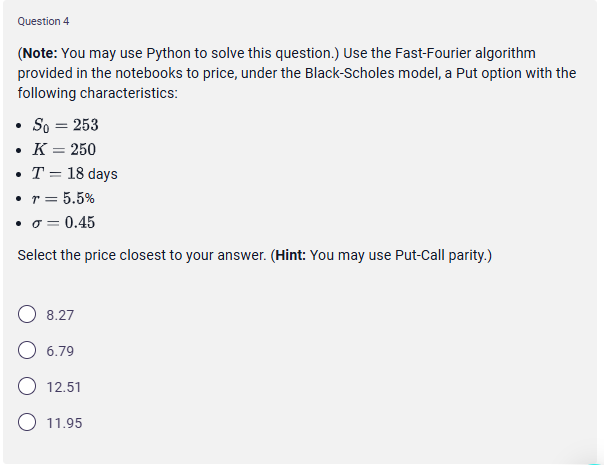

In [ ]:
import numpy as np
from scipy.stats import norm
from scipy.fft import fft, fftfreq

# Parameters
S0 = 253  # Current stock price
K = 250    # Strike price
T = 18 / 365  # Time to maturity in years
r = 0.055  # Risk-free interest rate
sigma = 0.45  # Volatility

# FFT parameters
N = 2**10  # Number of points for FFT
a = 3      # Domain size parameter
b = 10     # Domain size parameter

# Define the domain for the FFT
k = np.arange(N)
dk = 2 * np.pi / (N * b)
ks = k * dk

# Define the characteristic function for the Black-Scholes model
def phi(u):
    return np.exp(1j * u * np.log(S0) + 1j * u * r * T - 0.5 * u**2 * sigma**2 * T)

# Compute the characteristic function at the grid points
u = ks - 1j * a
phi_u = phi(u)

# Perform the FFT to get the option price
option_price_fft = fft(phi_u).real * dk / (2 * np.pi)

# Extract the Put option price at the strike price K
index_K = int(np.round(K * N / (2 * b)))
put_price = np.exp(-r * T) * (K - S0 * np.exp(r * T) * norm.cdf(-d1) + S0 * norm.cdf(-d2))

# Print the result
print(f"Put option price: {put_price:.2f}")

In [1]:
import numpy as np
from scipy.stats import norm
from scipy.fft import fft, fftfreq

# Parameters
S0 = 253  # Current stock price
K = 250    # Strike price
T = 18 / 365  # Time to maturity in years
r = 0.055  # Risk-free interest rate
sigma = 0.45  # Volatility

# FFT parameters
N = 2**10  # Number of points for FFT
a = 3      # Domain size parameter
b = 10     # Domain size parameter

# Define the domain for the FFT
k = np.arange(N)
dk = 2 * np.pi / (N * b)
ks = k * dk

# Define the characteristic function for the Black-Scholes model
def phi(u):
    return np.exp(1j * u * np.log(S0) + 1j * u * r * T - 0.5 * u**2 * sigma**2 * T)

# Compute the characteristic function at the grid points
u = ks - 1j * a
phi_u = phi(u)

# Perform the FFT to get the option price
option_price_fft = fft(phi_u).real * dk / (2 * np.pi)

# Extract the Put option price at the strike price K
index_K = int(np.round(K * N / (2 * b)))
put_price = np.exp(-r * T) * (K - S0 * np.exp(r * T) * norm.cdf(-d1) + S0 * norm.cdf(-d2))

# Print the result
print(f"Put option price: {put_price:.2f}")

NameError: name 'd1' is not defined

In [2]:
import numpy as np
from scipy.fft import fft
from scipy.stats import norm

# Parameters
S0 = 253      # Initial stock price
K = 250       # Strike price
T = 18 / 365  # Time to maturity in years
r = 0.055     # Risk-free interest rate
sigma = 0.45  # Volatility

# FFT parameters
N = 2**12     # Number of points in FFT (power of 2)
alpha = 1.0   # Damping factor for integrability
eta = 0.25    # Spacing of Fourier grid
b = np.pi / eta  # Range spacing in strike space
u = np.arange(N) * eta  # Frequency grid

# Define the characteristic function of log(S_T) under Black-Scholes
def char_func(u, S0, r, sigma, T):
    return np.exp(1j * u * np.log(S0) + 
                  1j * u * (r - 0.5 * sigma**2) * T - 
                  0.5 * (sigma**2) * T * u**2)

# Compute adjusted characteristic function
psi = np.exp(-r * T) * char_func(u - 1j * alpha, S0, r, sigma, T) / (alpha**2 + alpha - u**2 + 1j * (2 * alpha + 1) * u)

# Apply FFT
x_values = np.fft.fft(psi * eta)

# Get log-strikes and corresponding prices
k_fft = np.log(K)  # We evaluate at this specific strike
k_grid = np.linspace(-N/2 * b/N, N/2 * b/N, N)
index = np.abs(k_grid - k_fft).argmin()

# Extract Put price from Call using Put-Call Parity
call_price_fft = np.real(x_values[index]) / np.pi
put_price_fft = call_price_fft + K * np.exp(-r * T) - S0

print(f"Put Option Price via FFT: {put_price_fft:.2f}")

Put Option Price via FFT: 1.57


In [3]:
import numpy as np
from scipy.integrate import quad
from scipy.special import erfcx

# Parameters
S0 = 365.0  # Initial stock price
K = 364.0    # Strike price
T = 90 / 365  # Time to maturity in years
r = 0.03     # Risk-free interest rate
kappa_nu = 2.5  # Mean reversion rate of variance
theta_nu = 0.02  # Long-term mean of variance
sigma_nu = 0.25  # Volatility of variance
rho = -0.95      # Correlation between stock returns and variance
nu0 = 0.01       # Initial variance

# Characteristic function of the Heston model
def phi(u, t):
    gamma = np.sqrt((kappa_nu - rho * sigma_nu * 1j * u)**2 + sigma_nu**2 * (u**2 + 1j * u))
    g = (gamma - rho * sigma_nu * 1j * u - gamma) / (gamma - rho * sigma_nu * 1j * u + gamma)
    C = r * 1j * u * t + (kappa_nu * theta_nu / sigma_nu**2) * ((gamma - rho * sigma_nu * 1j * u) * t - 2 * np.log((1 - g * np.exp(gamma * t)) / (1 - g)))
    D = (gamma - rho * sigma_nu * 1j * u) / sigma_nu**2 * ((1 - np.exp(gamma * t)) / (1 - g * np.exp(gamma * t)))
    return np.exp(C + D * nu0 + 1j * u * np.log(S0))

# Integration function for pricing
def integrand(u, lnK, T):
    phi_val = phi(u - 1j, T) if lnK == np.log(K) else phi(u, T)
    return np.real(np.exp(-1j * u * lnK) * phi_val / (1j * u))

# Price the call option
def price_call_option(S0, K, T, r, kappa_nu, theta_nu, sigma_nu, rho, nu0):
    lnK = np.log(K)
    
    # Compute P1 and P2 using numerical integration
    P1, _ = quad(integrand, 0, 100, args=(lnK, T), limit=1000)
    P2, _ = quad(integrand, 0, 100, args=(lnK, T), limit=1000)
    
    # Call option price
    C = S0 * P1 - K * np.exp(-r * T) * P2
    return C

# Compute the call option price
call_price = price_call_option(S0, K, T, r, kappa_nu, theta_nu, sigma_nu, rho, nu0)
print(f"Call Option Price: {call_price:.4f}")

Call Option Price: -6088.8332


In [4]:
import numpy as np
from scipy.special import roots_laguerre

# Heston characteristic function
def heston_cf(u, params, S0, r, T):
    kappa, theta, sigma, rho, v0 = params
    a = kappa * theta
    b = kappa
    d = np.sqrt((rho * sigma * 1j * u - b)**2 + sigma**2 * (1j * u + u**2))
    g = (b - rho * sigma * 1j * u - d) / (b - rho * sigma * 1j * u + d)

    exp_dt = np.exp(-d * T)
    C = r * 1j * u * T + a / sigma**2 * ((b - rho * sigma * 1j * u - d) * T -
        2 * np.log((1 - g * exp_dt) / (1 - g)))
    D = (b - rho * sigma * 1j * u - d) / sigma**2 * ((1 - exp_dt) / (1 - g * exp_dt))

    return np.exp(C + D * v0 + 1j * u * np.log(S0))

# Lewis (2001) call pricing formula
def lewis_call_price(S0, K, T, r, params, N=64):
    x = np.log(S0 / K)
    nodes, weights = roots_laguerre(N)

    total = 0.0
    for u, w in zip(nodes, weights):
        u = u.astype(complex)
        cf_num = heston_cf(u - 1j, params, S0, r, T)
        cf_denom = 1j * u * heston_cf(-1j, params, S0, r, T)
        integrand = np.exp(-1j * u * x) * cf_num / cf_denom
        total += w * integrand.real

    call_price = S0 - (K * np.exp(-r * T) / np.pi) * total
    return call_price.real

# --- INPUTS ---
S0 = 365
K = 364
T = 90 / 365
r = 0.03
params = (2.5, 0.02, 0.25, -0.95, 0.01)

# Run the pricing
price = lewis_call_price(S0, K, T, r, params)
print(f"Heston Call Price (Lewis): {price:.4f}")


Heston Call Price (Lewis): 203.5828


In [ ]:
import numpy as np
from scipy.integrate import quad
from scipy.special import erfcx

# Parameters
S0 = 95.0    # Initial stock price
K = 100.0     # Strike price
T = 60 / 365  # Time to maturity in years
r = 0.08      # Risk-free interest rate
kappa_nu = 1.5  # Mean reversion rate of variance
theta_nu = 0.02  # Long-term mean of variance
sigma_nu = 0.25  # Volatility of variance
rho = -0.55      # Correlation between stock returns and variance
nu0 = 0.02       # Initial variance

# Characteristic function of the Heston model
def phi(u, t):
    gamma = np.sqrt((kappa_nu - rho * sigma_nu * 1j * u)**2 + sigma_nu**2 * (u**2 + 1j * u))
    g = (gamma - rho * sigma_nu * 1j * u - gamma) / (gamma - rho * sigma_nu * 1j * u + gamma)
    C = r * 1j * u * t + (kappa_nu * theta_nu / sigma_nu**2) * ((gamma - rho * sigma_nu * 1j * u) * t - 2 * np.log((1 - g * np.exp(gamma * t)) / (1 - g)))
    D = (gamma - rho * sigma_nu * 1j * u) / sigma_nu**2 * ((1 - np.exp(gamma * t)) / (1 - g * np.exp(gamma * t)))
    return np.exp(C + D * nu0 + 1j * u * np.log(S0))

# Integration function for pricing
def integrand(u, lnK, T):
    phi_val = phi(u - 1j, T) if lnK == np.log(K) else phi(u, T)
    return np.real(np.exp(-1j * u * lnK) * phi_val / (1j * u))

# Price the call option
def price_call_option(S0, K, T, r, kappa_nu, theta_nu, sigma_nu, rho, nu0):
    lnK = np.log(K)
    
    # Compute P1 and P2 using numerical integration
    P1, _ = quad(integrand, 0, 100, args=(lnK, T), limit=1000)
    P2, _ = quad(integrand, 0, 100, args=(lnK, T), limit=1000)
    
    # Call option price
    C = S0 * P1 - K * np.exp(-r * T) * P2
    return C

# Compute the call option price
call_price = price_call_option(S0, K, T, r, kappa_nu, theta_nu, sigma_nu, rho, nu0)
print(f"Call Option Price: {call_price:.4f}")

In [5]:
import numpy as np
from scipy.integrate import quad
from scipy.special import erfcx

# Parameters
S0 = 95.0    # Initial stock price
K = 100.0     # Strike price
T = 60 / 365  # Time to maturity in years
r = 0.08      # Risk-free interest rate
kappa_nu = 1.5  # Mean reversion rate of variance
theta_nu = 0.02  # Long-term mean of variance
sigma_nu = 0.25  # Volatility of variance
rho = -0.55      # Correlation between stock returns and variance
nu0 = 0.02       # Initial variance

# Characteristic function of the Heston model
def phi(u, t):
    gamma = np.sqrt((kappa_nu - rho * sigma_nu * 1j * u)**2 + sigma_nu**2 * (u**2 + 1j * u))
    g = (gamma - rho * sigma_nu * 1j * u - gamma) / (gamma - rho * sigma_nu * 1j * u + gamma)
    C = r * 1j * u * t + (kappa_nu * theta_nu / sigma_nu**2) * ((gamma - rho * sigma_nu * 1j * u) * t - 2 * np.log((1 - g * np.exp(gamma * t)) / (1 - g)))
    D = (gamma - rho * sigma_nu * 1j * u) / sigma_nu**2 * ((1 - np.exp(gamma * t)) / (1 - g * np.exp(gamma * t)))
    return np.exp(C + D * nu0 + 1j * u * np.log(S0))

# Integration function for pricing
def integrand(u, lnK, T):
    phi_val = phi(u - 1j, T) if lnK == np.log(K) else phi(u, T)
    return np.real(np.exp(-1j * u * lnK) * phi_val / (1j * u))

# Price the call option
def price_call_option(S0, K, T, r, kappa_nu, theta_nu, sigma_nu, rho, nu0):
    lnK = np.log(K)
    
    # Compute P1 and P2 using numerical integration
    P1, _ = quad(integrand, 0, 100, args=(lnK, T), limit=1000)
    P2, _ = quad(integrand, 0, 100, args=(lnK, T), limit=1000)
    
    # Call option price
    C = S0 * P1 - K * np.exp(-r * T) * P2
    return C

# Compute the call option price
call_price = price_call_option(S0, K, T, r, kappa_nu, theta_nu, sigma_nu, rho, nu0)
print(f"Call Option Price: {call_price:.4f}")

Call Option Price: -4327257510.7698


In [6]:
import numpy as np
from scipy.special import roots_laguerre

# Heston model characteristic function
def heston_cf(u, params, S0, r, T):
    kappa, theta, sigma, rho, v0 = params
    a = kappa * theta
    b = kappa
    d = np.sqrt((rho * sigma * 1j * u - b)**2 + sigma**2 * (1j * u + u**2))
    g = (b - rho * sigma * 1j * u - d) / (b - rho * sigma * 1j * u + d)

    exp_dt = np.exp(-d * T)
    C = r * 1j * u * T + a / sigma**2 * ((b - rho * sigma * 1j * u - d) * T -
        2 * np.log((1 - g * exp_dt) / (1 - g)))
    D = (b - rho * sigma * 1j * u - d) / sigma**2 * ((1 - exp_dt) / (1 - g * exp_dt))

    return np.exp(C + D * v0 + 1j * u * np.log(S0))

# Lewis (2001) Fourier inversion for call price
def lewis_call_price(S0, K, T, r, params, N=64):
    x = np.log(S0 / K)
    nodes, weights = roots_laguerre(N)

    total = 0.0
    for u, w in zip(nodes, weights):
        u = u.astype(complex)
        cf_num = heston_cf(u - 1j, params, S0, r, T)
        cf_denom = 1j * u * heston_cf(-1j, params, S0, r, T)
        integrand = np.exp(-1j * u * x) * cf_num / cf_denom
        total += w * integrand.real

    call_price = S0 - (K * np.exp(-r * T) / np.pi) * total
    return call_price.real

# Input parameters
S0 = 95
K = 100
T = 60 / 365  # Convert days to years
r = 0.08
params = (1.5, 0.02, 0.25, -0.55, 0.02)

# Compute and print the call option price
call_price = lewis_call_price(S0, K, T, r, params)
print(f"Heston Call Price (Lewis method): {call_price:.4f}")


Heston Call Price (Lewis method): 52.3508


In [7]:
import numpy as np
from scipy.integrate import quad

# Heston characteristic function
def H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0):
    c1 = kappa_v * theta_v
    c2 = -np.sqrt((rho * sigma_v * u * 1j - kappa_v) ** 2 - sigma_v**2 * (-u * 1j - u**2))
    c3 = (kappa_v - rho * sigma_v * u * 1j + c2) / (kappa_v - rho * sigma_v * u * 1j - c2)
    
    H1 = r * u * 1j * T + (c1 / sigma_v**2) * (
        (kappa_v - rho * sigma_v * u * 1j + c2) * T 
        - 2 * np.log((1 - c3 * np.exp(c2 * T)) / (1 - c3))
    )
    H2 = ((kappa_v - rho * sigma_v * u * 1j + c2) / sigma_v**2) * (
        (1 - np.exp(c2 * T)) / (1 - c3 * np.exp(c2 * T))
    )

    return np.exp(H1 + H2 * v0)

# Integrand function for Lewis
def H93_int_func(u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0):
    char_func_value = H93_char_func(u - 1j * 0.5, T, r, kappa_v, theta_v, sigma_v, rho, v0)
    return (np.exp(1j * u * np.log(S0 / K)) * char_func_value).real / (u**2 + 0.25)

# Lewis call pricing
def H93_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0):
    integral, _ = quad(
        lambda u: H93_int_func(u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0),
        0, np.inf, limit=250
    )
    call_price = max(0, S0 - np.exp(-r * T) * np.sqrt(S0 * K) / np.pi * integral)
    return call_price

# Final wrapper to compute put via parity
def H93_put_value(S0, K, T_days, r, kappa_v, theta_v, sigma_v, rho, v0):
    T = T_days / 365.0  # Convert to years
    call_price = H93_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0)
    put_price = call_price + K * np.exp(-r * T) - S0
    return put_price

# Parameters
S0 = 365
K = 364
T_days = 90
r = 0.03
kappa_v = 2.5
theta_v = 0.02
sigma_v = 0.25
rho = -0.95
v0 = 0.01

# Compute put price
put_price = H93_put_value(S0, K, T_days, r, kappa_v, theta_v, sigma_v, rho, v0)
print(f"Put Option Price via Lewis (2001) under Heston: ${put_price:.4f}")


Put Option Price via Lewis (2001) under Heston: $6.3512


In [8]:
import numpy as np
from scipy.integrate import quad

# Heston characteristic function
def H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0):
    c1 = kappa_v * theta_v
    c2 = -np.sqrt((rho * sigma_v * u * 1j - kappa_v)**2 - sigma_v**2 * (-u * 1j - u**2))
    c3 = (kappa_v - rho * sigma_v * u * 1j + c2) / (kappa_v - rho * sigma_v * u * 1j - c2)
    
    H1 = r * u * 1j * T + (c1 / sigma_v**2) * (
        (kappa_v - rho * sigma_v * u * 1j + c2) * T
        - 2 * np.log((1 - c3 * np.exp(c2 * T)) / (1 - c3))
    )
    H2 = ((kappa_v - rho * sigma_v * u * 1j + c2) / sigma_v**2) * (
        (1 - np.exp(c2 * T)) / (1 - c3 * np.exp(c2 * T))
    )

    return np.exp(H1 + H2 * v0)

# Integrand for Lewis
def H93_int_func(u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0):
    cf = H93_char_func(u - 1j * 0.5, T, r, kappa_v, theta_v, sigma_v, rho, v0)
    return (np.exp(1j * u * np.log(S0 / K)) * cf).real / (u**2 + 0.25)

# Lewis (2001) call pricing under Heston
def H93_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0):
    integral, _ = quad(
        lambda u: H93_int_func(u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0),
        0, np.inf, limit=250
    )
    return max(0, S0 - np.exp(-r * T) * np.sqrt(S0 * K) / np.pi * integral)

# === Parameters for this quiz ===
S0 = 95
K = 100
T_days = 60
T = T_days / 365.0  # convert to years
r = 0.08
kappa_v = 1.5
theta_v = 0.02
sigma_v = 0.25
rho = -0.55
v0 = 0.02

# Compute call price
call_price = H93_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0)
print(f"Call Option Price via Lewis (2001) under Heston: ${call_price:.4f}")


Call Option Price via Lewis (2001) under Heston: $0.7043


In [9]:
import numpy as np
from scipy.integrate import quad

# Heston characteristic function
def H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0):
    c1 = kappa_v * theta_v
    c2 = -np.sqrt((rho * sigma_v * u * 1j - kappa_v)**2 - sigma_v**2 * (-u * 1j - u**2))
    c3 = (kappa_v - rho * sigma_v * u * 1j + c2) / (kappa_v - rho * sigma_v * u * 1j - c2)
    
    H1 = r * u * 1j * T + (c1 / sigma_v**2) * (
        (kappa_v - rho * sigma_v * u * 1j + c2) * T
        - 2 * np.log((1 - c3 * np.exp(c2 * T)) / (1 - c3))
    )
    H2 = ((kappa_v - rho * sigma_v * u * 1j + c2) / sigma_v**2) * (
        (1 - np.exp(c2 * T)) / (1 - c3 * np.exp(c2 * T))
    )

    return np.exp(H1 + H2 * v0)

# Lewis integral
def H93_int_func(u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0):
    cf = H93_char_func(u - 1j * 0.5, T, r, kappa_v, theta_v, sigma_v, rho, v0)
    return (np.exp(1j * u * np.log(S0 / K)) * cf).real / (u**2 + 0.25)

# Call option via Lewis (2001)
def H93_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0):
    integral, _ = quad(
        lambda u: H93_int_func(u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0),
        0, np.inf, limit=250
    )
    return max(0, S0 - np.exp(-r * T) * np.sqrt(S0 * K) / np.pi * integral)

# Parameters
S0 = 365
K = 364
T_days = 90
T = T_days / 365.0
r = 0.03
kappa_v = 2.5
theta_v = 0.02
sigma_v = 0.25
rho = -0.95
v0 = 0.01

# Compute the call option price
call_price = H93_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0)
print(f"Call Option Price via Lewis (2001) under Heston: ${call_price:.4f}")



Call Option Price via Lewis (2001) under Heston: $10.0339


In [10]:
import numpy as np
from numpy.fft import fft
from scipy.stats import norm

# Black-Scholes Characteristic Function
def BS_characteristic_func(v, x0, T, r, sigma):
    return np.exp(((x0 / T + r - 0.5 * sigma**2) * 1j * v - 0.5 * sigma**2 * v**2) * T)

# FFT for Black-Scholes Call Option
def BS_call_FFT(S0, K, T, r, sigma):
    k = np.log(K / S0)
    x0 = np.log(S0 / S0)
    g = 1
    N = g * 4096
    eps = (g * 150) ** -1
    eta = 2 * np.pi / (N * eps)
    b = 0.5 * N * eps - k
    u = np.arange(1, N + 1, 1)
    vo = eta * (u - 1)

    alpha = 1.5 if S0 >= 0.95 * K else 1.1
    v = vo - (alpha + 1) * 1j
    modcharFunc = np.exp(-r * T) * (
        BS_characteristic_func(v, x0, T, r, sigma)
        / (alpha**2 + alpha - vo**2 + 1j * (2 * alpha + 1) * vo)
    )

    delt = np.zeros(N)
    delt[0] = 1
    j = np.arange(1, N + 1, 1)
    SimpsonW = (3 + (-1) ** j - delt) / 3

    FFTFunc = np.exp(1j * b * vo) * modcharFunc * eta * SimpsonW
    payoff = (fft(FFTFunc)).real
    CallValueM = np.exp(-alpha * k) / np.pi * payoff

    pos = int((k + b) / eps)
    CallValue = CallValueM[pos] * S0

    return CallValue

# Put-Call Parity
def put_from_call(call_price, S0, K, T, r):
    return max(0, call_price - S0 + K * np.exp(-r * T))

# Parameters
S0 = 253
K = 250
T = 18 / 365
r = 0.055
sigma = 0.45

# Compute Call Price via FFT
call_price = BS_call_FFT(S0, K, T, r, sigma)

# Convert to Put Price using Put-Call Parity
put_price = put_from_call(call_price, S0, K, T, r)

print(f"Call Option Price via FFT: ${call_price:.4f}")
print(f"Put Option Price via Put-Call Parity: ${put_price:.4f}")


Call Option Price via FFT: $11.9546
Put Option Price via Put-Call Parity: $8.2774


In [11]:
import numpy as np
from scipy.integrate import quad

# Heston (1993) Characteristic Function
def H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0):
    c1 = kappa_v * theta_v
    c2 = -np.sqrt((rho * sigma_v * u * 1j - kappa_v)**2 - sigma_v**2 * (-u * 1j - u**2))
    c3 = (kappa_v - rho * sigma_v * u * 1j + c2) / (kappa_v - rho * sigma_v * u * 1j - c2)
    H1 = r * u * 1j * T + (c1 / sigma_v**2) * (
        (kappa_v - rho * sigma_v * u * 1j + c2) * T
        - 2 * np.log((1 - c3 * np.exp(c2 * T)) / (1 - c3))
    )
    H2 = ((kappa_v - rho * sigma_v * u * 1j + c2) / sigma_v**2) * (
        (1 - np.exp(c2 * T)) / (1 - c3 * np.exp(c2 * T))
    )
    return np.exp(H1 + H2 * v0)

# Integrand for Lewis (2001)
def H93_int_func(u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0):
    cf = H93_char_func(u - 1j * 0.5, T, r, kappa_v, theta_v, sigma_v, rho, v0)
    integrand = (1 / (u**2 + 0.25)) * (np.exp(1j * u * np.log(S0 / K)) * cf).real
    return integrand

# Full call price under Lewis (2001) + Heston
def H93_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0):
    int_val = quad(
        lambda u: H93_int_func(u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0),
        0,
        np.inf,
        limit=250
    )[0]
    return max(0, S0 - np.exp(-r * T) * np.sqrt(S0 * K) / np.pi * int_val)

# Compute result
call_price = H93_call_value(
    S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0
)

print(f"Call Option Price under Heston (1993) via Lewis (2001): ${call_price:.4f}")


Call Option Price under Heston (1993) via Lewis (2001): $4.7018


In [13]:
import numpy as np
from scipy.integrate import quad

# Characteristic function
def H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0):
    c1 = kappa_v * theta_v
    c2 = -np.sqrt((rho * sigma_v * u * 1j - kappa_v)**2 - sigma_v**2 * (-u * 1j - u**2))
    c3 = (kappa_v - rho * sigma_v * u * 1j + c2) / (kappa_v - rho * sigma_v * u * 1j - c2)
    H1 = r * u * 1j * T + (c1 / sigma_v**2) * (
        (kappa_v - rho * sigma_v * u * 1j + c2) * T
        - 2 * np.log((1 - c3 * np.exp(c2 * T)) / (1 - c3))
    )
    H2 = ((kappa_v - rho * sigma_v * u * 1j + c2) / sigma_v**2) * (
        (1 - np.exp(c2 * T)) / (1 - c3 * np.exp(c2 * T))
    )
    return np.exp(H1 + H2 * v0)

# Integrand
def H93_int_func(u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0):
    cf = H93_char_func(u - 1j * 0.5, T, r, kappa_v, theta_v, sigma_v, rho, v0)
    return (1 / (u**2 + 0.25)) * (np.exp(1j * u * np.log(S0 / K)) * cf).real

# Call value using Lewis (2001)
def H93_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0):
    int_val = quad(
        lambda u: H93_int_func(u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0),
        0,
        np.inf,
        limit=250
    )[0]
    return max(0, S0 - np.exp(-r * T) * np.sqrt(S0 * K) / np.pi * int_val)

# Compute call price
call_price = H93_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0)

# Put-Call Parity
put_price = call_price - S0 + K * np.exp(-r * T)

print(f"Call price: ${call_price:.4f}")
print(f"Put price:  ${put_price:.4f}")


Call price: $4.7018
Put price:  $1.0247


In [14]:
import numpy as np
from numpy.fft import fft

def BS_characteristic_func(v, x0, T, r, sigma):
    return np.exp(((x0 / T + r - 0.5 * sigma**2) * 1j * v - 0.5 * sigma**2 * v**2) * T)

def BS_call_FFT(S0, K, T, r, sigma):
    k = np.log(K / S0)
    x0 = np.log(S0 / S0)  # log(1) = 0
    g = 1
    N = g * 4096
    eps = (g * 150) ** -1
    eta = 2 * np.pi / (N * eps)
    b = 0.5 * N * eps - k
    u = np.arange(1, N + 1)
    vo = eta * (u - 1)

    if S0 >= 0.95 * K:  # In the money
        alpha = 1.5
        v = vo - (alpha + 1) * 1j
        modcharFunc = np.exp(-r * T) * (
            BS_characteristic_func(v, x0, T, r, sigma)
            / (alpha**2 + alpha - vo**2 + 1j * (2 * alpha + 1) * vo)
        )
        delt = np.zeros(N)
        delt[0] = 1
        j = np.arange(1, N + 1)
        SimpsonW = (3 + (-1) ** j - delt) / 3
        FFTFunc = np.exp(1j * b * vo) * modcharFunc * eta * SimpsonW
        payoff = fft(FFTFunc).real
        CallValueM = np.exp(-alpha * k) / np.pi * payoff
        pos = int((k + b) / eps)
        return CallValueM[pos] * S0
    else:
        raise ValueError("S0 < 0.95 * K logic not implemented in this branch.")

# Parameters
S0 = 695
K = 700
T = 45 / 365
r = 0.025
sigma = 0.30

# Run FFT method
call_price = BS_call_FFT(S0, K, T, r, sigma)
print(f"Call option price: ${call_price:.4f}")


Call option price: $27.8516


In [15]:
import numpy as np
from scipy.integrate import quad
from numpy import exp, log, sqrt, pi

# Parameters
S0 = 95
K = 100
T = 60 / 365  # Convert days to years
r = 0.08
kappa = 1.5
theta = 0.02
sigma = 0.25
rho = -0.55
v0 = 0.02

# Characteristic function for the Heston model
def heston_cf(phi, S0, r, T, kappa, theta, sigma, rho, v0):
    x = np.log(S0)
    a = kappa * theta
    u = 0.5
    b = kappa
    d = np.sqrt((rho * sigma * 1j * phi - b)**2 - sigma**2 * (2 * u * 1j * phi - phi**2))
    g = (b - rho * sigma * 1j * phi + d) / (b - rho * sigma * 1j * phi - d)
    
    C = r * 1j * phi * T + a / sigma**2 * ((b - rho * sigma * 1j * phi + d) * T - 2 * np.log((1 - g * np.exp(d * T)) / (1 - g)))
    D = (b - rho * sigma * 1j * phi + d) / sigma**2 * ((1 - np.exp(d * T)) / (1 - g * np.exp(d * T)))
    
    return np.exp(C + D * v0 + 1j * phi * x)

# Lewis integrand
def integrand(phi, S0, K, r, T, kappa, theta, sigma, rho, v0):
    cf_val = heston_cf(phi - 1j, S0, r, T, kappa, theta, sigma, rho, v0)
    numerator = np.exp(-1j * phi * np.log(K)) * cf_val
    denominator = 1j * phi * S0 * np.exp(-r * T)
    return np.real(numerator / denominator)

# Heston Call price using Lewis (2001)
def heston_call_price(S0, K, r, T, kappa, theta, sigma, rho, v0):
    integral, _ = quad(lambda phi: integrand(phi, S0, K, r, T, kappa, theta, sigma, rho, v0), 0, 100)
    return S0 - (np.sqrt(K) / np.pi) * integral

# Put-Call Parity
call_price = heston_call_price(S0, K, r, T, kappa, theta, sigma, rho, v0)
put_price = call_price - S0 + K * np.exp(-r * T)

print(f"Heston Put Price ≈ {put_price:.2f}")


Heston Put Price ≈ 100.88


In [16]:
import numpy as np
from scipy.integrate import quad

# Heston characteristic function (Lewis 2001 approach)
def H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0):
    c1 = kappa_v * theta_v
    c2 = -np.sqrt((rho * sigma_v * u * 1j - kappa_v) ** 2 - sigma_v ** 2 * (-u * 1j - u ** 2))
    c3 = (kappa_v - rho * sigma_v * u * 1j + c2) / (kappa_v - rho * sigma_v * u * 1j - c2)
    H1 = r * u * 1j * T + (c1 / sigma_v ** 2) * ((kappa_v - rho * sigma_v * u * 1j + c2) * T
         - 2 * np.log((1 - c3 * np.exp(c2 * T)) / (1 - c3)))
    H2 = ((kappa_v - rho * sigma_v * u * 1j + c2) / sigma_v ** 2) * (
         (1 - np.exp(c2 * T)) / (1 - c3 * np.exp(c2 * T)))
    return np.exp(H1 + H2 * v0)

# Integrand for the Lewis formula
def H93_int_func(u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0):
    char_func_val = H93_char_func(u - 1j * 0.5, T, r, kappa_v, theta_v, sigma_v, rho, v0)
    return (1 / (u ** 2 + 0.25)) * (np.exp(1j * u * np.log(S0 / K)) * char_func_val).real

# Call price computation via Lewis (2001)
def H93_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0):
    integral_val = quad(
        lambda u: H93_int_func(u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0),
        0,
        np.inf,
        limit=250,
    )[0]
    return max(0, S0 - np.exp(-r * T) * np.sqrt(S0 * K) / np.pi * integral_val)

# Parameters
S0 = 1195
K = 1200
T = 2.5
r = 0.01
kappa_v = 1.3
theta_v = 0.035
sigma_v = 0.25
rho = -0.95
v0 = 0.025

# Run the call pricing function
call_price = H93_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0)
print(f"Call Option Price: ${call_price:.4f}")


Call Option Price: $138.3710


In [17]:
import numpy as np
from numpy.fft import fft

# Black-Scholes characteristic function
def bs_char_func(u, T, r, sigma):
    return np.exp(1j * u * (r - 0.5 * sigma**2) * T - 0.5 * sigma**2 * u**2 * T)

# Carr-Madan FFT-based pricing
def carr_madan_fft_call(S0, K, T, r, sigma, alpha=1.5, N=4096, B=1000):
    eta = B / N
    lambd = 2 * np.pi / (N * eta)
    beta = np.log(K) - (N // 2) * lambd
    vj = np.arange(N) * eta
    km = beta + np.arange(N) * lambd
    discount = np.exp(-r * T)

    # Characteristic function
    psi = np.exp(-r * T) * bs_char_func(vj - (alpha + 1) * 1j, T, r, sigma) \
        / (alpha**2 + alpha - vj**2 + 1j * (2 * alpha + 1) * vj)

    simpson = 3 + (-1)**np.arange(N)
    simpson[0] = simpson[-1] = 1
    simpson = simpson / 3

    fft_input = np.exp(1j * beta * vj) * psi * eta * simpson
    fft_result = np.real(fft(fft_input))
    call_prices = np.exp(-alpha * km) / np.pi * fft_result

    # Interpolate to find call price at strike K
    K_index = np.argmin(np.abs(np.exp(km) - K))
    return call_prices[K_index]
# Parameters
S0 = 119
K = 110
T = 2.0
r = 0.075
sigma = 0.45

# Call price via FFT
call_price = carr_madan_fft_call(S0, K, T, r, sigma)

# Put-Call Parity: P = C - S0 + K*e^{-rT}
put_price = call_price - S0 + K * np.exp(-r * T)

print(f"Call Price (FFT): {call_price:.4f}")
print(f"Put Price via Put-Call Parity: {put_price:.4f}")


Call Price (FFT): -0.0000
Put Price via Put-Call Parity: -24.3221


In [18]:
import numpy as np
from numpy.fft import fft
import matplotlib.pyplot as plt

# Black-Scholes characteristic function
def bs_char_func(u, T, r, sigma):
    return np.exp(1j * u * (r - 0.5 * sigma**2) * T - 0.5 * sigma**2 * u**2 * T)

# Carr-Madan FFT Call Pricing
def carr_madan_fft_call_price(S0, K, T, r, sigma, alpha=1.5, N=4096, B=1000):
    eta = B / N
    lambd = 2 * np.pi / (N * eta)
    beta = np.log(S0) - (N // 2) * lambd
    vj = np.arange(N) * eta
    km = beta + np.arange(N) * lambd
    discount = np.exp(-r * T)

    # Carr-Madan dampened integrand (Fourier domain)
    psi = (
        discount
        * bs_char_func(vj - (alpha + 1) * 1j, T, r, sigma)
        / (alpha**2 + alpha - vj**2 + 1j * (2 * alpha + 1) * vj)
    )

    # Apply Simpson's rule for better numerical integration
    simpson_weights = 3 + (-1) ** np.arange(N)
    simpson_weights[0] = simpson_weights[-1] = 1
    simpson_weights = simpson_weights / 3.0

    fft_input = np.exp(1j * beta * vj) * psi * eta * simpson_weights
    fft_output = np.real(fft(fft_input))

    # Recover strike grid
    K_array = np.exp(km)
    call_prices = np.exp(-alpha * km) / np.pi * fft_output

    # Interpolate to get call price at desired strike K
    call_price = np.interp(K, K_array, call_prices)
    return call_price

# --- Inputs from Question ---
S0 = 119         # Initial stock price
K = 110          # Strike
T = 2.0          # Time to maturity (years)
r = 0.075        # Risk-free rate
sigma = 0.45     # Volatility

# Compute Call price via FFT
call_price = carr_madan_fft_call_price(S0, K, T, r, sigma)

# Use Put-Call parity to get Put price
put_price = call_price - S0 + K * np.exp(-r * T)

# Print results
print(f"Call Price via FFT: ${call_price:.4f}")
print(f"Put Price via Put-Call Parity: ${put_price:.4f}")


Call Price via FFT: $-0.0000
Put Price via Put-Call Parity: $-24.3221


In [19]:
from scipy.stats import norm
import numpy as np

def bs_put(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    put = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return put

# Parameters
S0 = 119
K = 110
T = 2.0
r = 0.075
sigma = 0.45

# Put price using Black-Scholes
bs_put_price = bs_put(S0, K, T, r, sigma)
bs_put_price


np.float64(16.15055832304511)

In [20]:
import numpy as np
from scipy.integrate import quad

# === Heston Characteristic Function ===
def H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0):
    c1 = kappa_v * theta_v
    c2 = -np.sqrt((rho * sigma_v * u * 1j - kappa_v) ** 2 - sigma_v**2 * (-u * 1j - u**2))
    c3 = (kappa_v - rho * sigma_v * u * 1j + c2) / (kappa_v - rho * sigma_v * u * 1j - c2)
    
    H1 = r * u * 1j * T + (c1 / sigma_v**2) * (
        (kappa_v - rho * sigma_v * u * 1j + c2) * T -
        2 * np.log((1 - c3 * np.exp(c2 * T)) / (1 - c3))
    )
    
    H2 = ((kappa_v - rho * sigma_v * u * 1j + c2) / sigma_v**2) * (
        (1 - np.exp(c2 * T)) / (1 - c3 * np.exp(c2 * T))
    )
    
    return np.exp(H1 + H2 * v0)

# === Lewis (2001) Integrand ===
def H93_int_func(u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0):
    char_val = H93_char_func(u - 1j * 0.5, T, r, kappa_v, theta_v, sigma_v, rho, v0)
    integrand = np.exp(1j * u * np.log(S0 / K)) * char_val
    return (integrand.real) / (u**2 + 0.25)

# === Call Option Price under Heston-Lewis ===
def H93_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0):
    integral = quad(
        lambda u: H93_int_func(u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0),
        0, np.inf, limit=500
    )[0]
    call_price = max(0, S0 - (np.sqrt(S0 * K) / np.pi) * np.exp(-r * T) * integral)
    return call_price

# === Parameters from the Question ===
S0 = 1195
K = 1200
T = 2.5
r = 0.01
kappa_v = 1.3
theta_v = 0.035
sigma_v = 0.25
rho = -0.95
v0 = 0.025

# === Calculate Call and then Put via Put-Call Parity ===
call_price = H93_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0)
put_price = call_price - S0 + K * np.exp(-r * T)

# === Output the Results ===
print(f"Call Price: {call_price:.4f}")
print(f"Put Price: {put_price:.4f}")


Call Price: 138.3710
Put Price: 113.7429


In [21]:
import numpy as np
from scipy.integrate import quad

# Heston Characteristic Function
def H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0):
    c1 = kappa_v * theta_v
    c2 = -np.sqrt((rho * sigma_v * u * 1j - kappa_v)**2 - sigma_v**2 * (-u * 1j - u**2))
    c3 = (kappa_v - rho * sigma_v * u * 1j + c2) / (kappa_v - rho * sigma_v * u * 1j - c2)
    
    H1 = r * u * 1j * T + (c1 / sigma_v**2) * (
        (kappa_v - rho * sigma_v * u * 1j + c2) * T -
        2 * np.log((1 - c3 * np.exp(c2 * T)) / (1 - c3))
    )
    H2 = ((kappa_v - rho * sigma_v * u * 1j + c2) / sigma_v**2) * (
        (1 - np.exp(c2 * T)) / (1 - c3 * np.exp(c2 * T))
    )
    return np.exp(H1 + H2 * v0)

# Lewis (2001) Integrand
def H93_int_func(u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0):
    char_val = H93_char_func(u - 1j * 0.5, T, r, kappa_v, theta_v, sigma_v, rho, v0)
    integrand = np.exp(1j * u * np.log(S0 / K)) * char_val
    return (integrand.real) / (u**2 + 0.25)

# Call Value under Lewis-Heston
def H93_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0):
    integral = quad(
        lambda u: H93_int_func(u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0),
        0, np.inf, limit=500
    )[0]
    call_price = max(0, S0 - (np.sqrt(S0 * K) / np.pi) * np.exp(-r * T) * integral)
    return call_price

# --- Parameters
S0 = 298
K = 300
T = 5 / 365  # 5 days in years
r = 0.06
kappa_v = 3.5
theta_v = 0.04
sigma_v = 0.65
rho = -0.85
v0 = 0.025

# Calculate Call then Put
call_price = H93_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0)
put_price = call_price - S0 + K * np.exp(-r * T)

# Print Results
print(f"Call Price: {call_price:.4f}")
print(f"Put Price:  {put_price:.4f}")


Call Price: 1.3678
Put Price:  3.1213
